(100,)


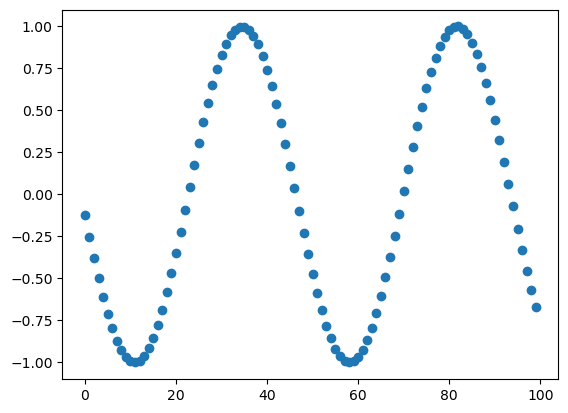

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def generate_data(num_steps: int, period_array: np.array, phase_array:np.array, num_series = None) -> None:
    '''Generate data for sine wave with noise.
        Assume that the time interval is in days.

        if num_series is not None then period_array and phase_array should be of length 1

        Args:
            num_steps: number of time steps in the sine wave 
            period_array: periods of the sine wave (days)
            phase_array: phases of the sine wave (radians)

        Returns:
            Pandas DataFrame with the generated data
        '''
    if num_series is None:
        num_series = len(period_array)
        if len(phase_array) != num_series:
            raise ValueError('period_array and phase_array must have the same length')
    else:
        if len(phase_array) != 1 and len(period_array) != 1:
            raise ValueError('period_array and phase_array must have length 1')
        phase_array = np.random.uniform(low=0, high=2*np.pi, size=num_series)
        period_array = np.repeat(period_array, num_series)  
        
    x = np.arange(0, num_steps, dtype=float)
    print (x.shape)

    series_list = []
    series_name = []
    for i in range(num_series):
        y = np.sin(2. * np.pi * x / period_array[i] + phase_array[i]) #+ np.random.normal(0, 0.1, x.shape)
        ser = pd.Series(y, index=x)
        series_list.append(ser)
        series_name.append(f'y{i}')

    df = pd.concat(series_list, axis=1)
    df.columns = series_name

    return df

def plot_timeseries(df: pd.DataFrame, indx=0 ) -> None:
    '''Plot the generated time series data.
        Args:
            df: Pandas DataFrame with the generated data
            indx: index of the time series to plot
        '''
    df[f'y{indx}' ].plot(style='o')  

    plt.show()

num_series = 500
num_steps = 100

periods = np.random.uniform(40, 100, num_series)
phases = np.random.uniform(0, 2*np.pi, num_series)
dfSine = generate_data(num_steps, periods, phases, num_series=None)

#periods = np.array([40])
#phases = np.array([0.2])
#dfSine = generate_data(num_steps, periods, phases, num_series=num_series)
plot_timeseries(dfSine, indx=50)

In [2]:
from cesium import featurize

features_to_use = [
    "amplitude",
    "percent_beyond_1_std",
    "maximum",
    "max_slope",
    "median",
    "median_absolute_deviation",
    "percent_close_to_median",
    "minimum",
    "skew",
    "std",
    "period_fast",
    "weighted_average",
]
fset_cesium = featurize.featurize_time_series(
    times=dfSine[f'y1'].index,
    values=dfSine[f'y1' ].values,
    errors=None,
    features_to_use=features_to_use,
)
print(fset_cesium.head())

feature amplitude percent_beyond_1_std   maximum max_slope    median  \
channel         0                    0         0         0         0   
0         0.99998                 0.52  0.999997  0.134365 -0.109972   

feature median_absolute_deviation percent_close_to_median   minimum      skew  \
channel                         0                       0         0         0   
0                        0.722952                    0.13 -0.999962  0.111344   

feature       std period_fast weighted_average  
channel         0           0                0  
0        0.721371   46.698113        -0.060869  
